In [115]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [116]:
df = pd.DataFrame()
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [117]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

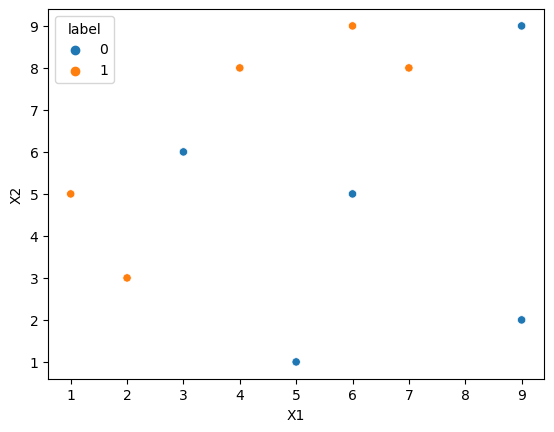

In [118]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [119]:
df['weight'] = 1/df.shape[0]

In [120]:
df.sample(3)

,X1,X2,label,weight
8,9,9,0,0.1
0,1,5,1,0.1
1,2,3,1,0.1


In [121]:
dt = DecisionTreeClassifier(max_depth=1)

In [122]:
x = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [123]:
x

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

In [124]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [125]:
dt.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

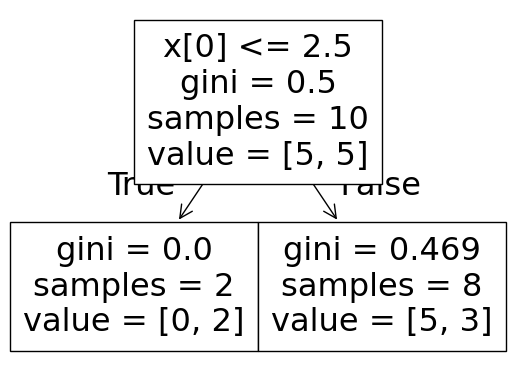

In [126]:
plot_tree(dt)

<Axes: >

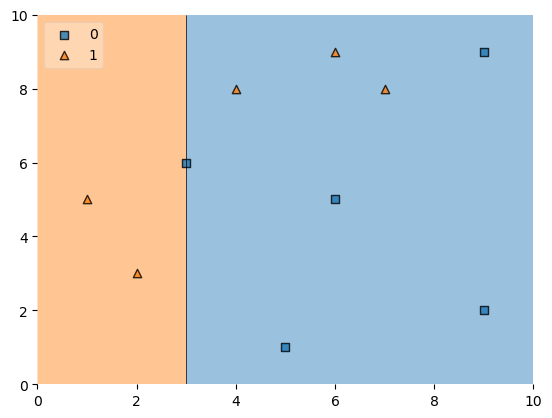

In [127]:
plot_decision_regions(x,y,clf=dt,legend=2)

In [128]:
df['y_pred'] = dt.predict(x)

In [129]:
df

,X1,X2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [130]:
error = np.abs(df['label'].sum() - df['y_pred'].sum())/df.shape[0]
error


0.3

In [131]:
def calculate_error_weight(error):
    return np.log((1-error)/error)/2

In [132]:
alpha = calculate_error_weight(error)
alpha

0.42364893019360184

In [133]:
def update_row_weight(row,alpha=alpha):
    if row['label']==row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)

In [134]:
df['new_wt'] = df.apply(update_row_weight,axis=1)

In [135]:
df

,X1,X2,label,weight,y_pred,new_wt
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,0,0.065465
3,4,8,1,0.1,0,0.152753
4,5,1,0,0.1,0,0.065465
5,6,9,1,0.1,0,0.152753
6,6,5,0,0.1,0,0.065465
7,7,8,1,0.1,0,0.152753
8,9,9,0,0.1,0,0.065465
9,9,2,0,0.1,0,0.065465


In [136]:
sum = df['new_wt'].sum()
df['norm_wt'] = df['new_wt']/sum

In [137]:
df

,X1,X2,label,weight,y_pred,new_wt,norm_wt
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,0,0.065465,0.071429
3,4,8,1,0.1,0,0.152753,0.166667
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,0,0.152753,0.166667
6,6,5,0,0.1,0,0.065465,0.071429
7,7,8,1,0.1,0,0.152753,0.166667
8,9,9,0,0.1,0,0.065465,0.071429
9,9,2,0,0.1,0,0.065465,0.071429


In [138]:
df['norm_wt'].sum()

0.9999999999999999

In [139]:
df['upper_wt'] = np.cumsum(df['norm_wt'])
df['lower_wt'] = df['upper_wt'] - df['norm_wt']

In [140]:
df

,X1,X2,label,weight,y_pred,new_wt,norm_wt,upper_wt,lower_wt
0,1,5,1,0.1,1,0.065465,0.071429,0.071429,0.000000
1,2,3,1,0.1,1,0.065465,0.071429,0.142857,0.071429
2,3,6,0,0.1,0,0.065465,0.071429,0.214286,0.142857
3,4,8,1,0.1,0,0.152753,0.166667,0.380952,0.214286
4,5,1,0,0.1,0,0.065465,0.071429,0.452381,0.380952
5,6,9,1,0.1,0,0.152753,0.166667,0.619048,0.452381
6,6,5,0,0.1,0,0.065465,0.071429,0.690476,0.619048
7,7,8,1,0.1,0,0.152753,0.166667,0.857143,0.690476
8,9,9,0,0.1,0,0.065465,0.071429,0.928571,0.857143
9,9,2,0,0.1,0,0.065465,0.071429,1.000000,0.928571


In [141]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for j,k in df.iterrows():
            if a>k['lower_wt'] and a<k['upper_wt']:
                indices.append(j)
    return indices


In [142]:
index_values = create_new_dataset(df)
index_values

[1, 5, 0, 2, 1, 3, 2, 9, 2, 7]

In [143]:
df2 = df.iloc[index_values,[0,1,2,3]]

In [144]:
df2

,X1,X2,label,weight
1,2,3,1,0.1
5,6,9,1,0.1
0,1,5,1,0.1
2,3,6,0,0.1
1,2,3,1,0.1
3,4,8,1,0.1
2,3,6,0,0.1
9,9,2,0,0.1
2,3,6,0,0.1
7,7,8,1,0.1


In [145]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [146]:
x = df2.iloc[:,0:2].values
y = df2.iloc[:,2].values

In [147]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.625, 0.5, '  False')]

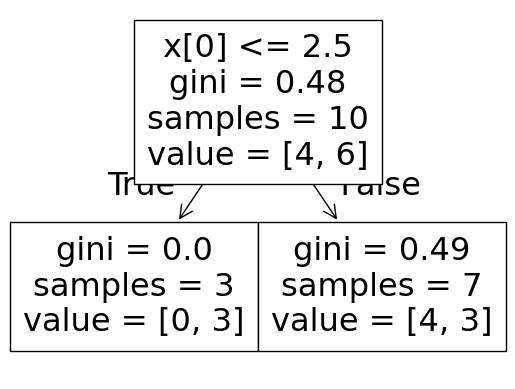

In [148]:
plot_tree(dt2)

<Axes: >

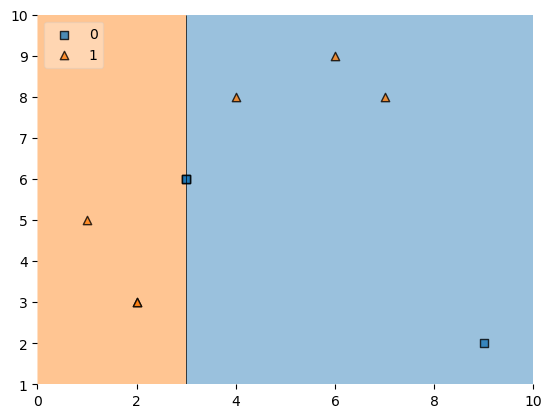

In [149]:
plot_decision_regions(x,y,clf=dt2,legend=2)

In [150]:
df2['y_pred'] = dt2.predict(x)

In [151]:
df2

,X1,X2,label,weight,y_pred
1,2,3,1,0.1,1
5,6,9,1,0.1,0
0,1,5,1,0.1,1
2,3,6,0,0.1,0
1,2,3,1,0.1,1
3,4,8,1,0.1,0
2,3,6,0,0.1,0
9,9,2,0,0.1,0
2,3,6,0,0.1,0
7,7,8,1,0.1,0


In [152]:
error = np.abs(df2['label'].sum() - df2['y_pred'].sum())/df2.shape[0]
error

0.3

In [153]:
alpha2 = calculate_error_weight(error)

In [154]:
def update_row_weight(row,alpha=alpha2):
    if row['label']==row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)

In [155]:
df2['new_wt'] = df2.apply(update_row_weight,axis=1)

In [156]:
df2

,X1,X2,label,weight,y_pred,new_wt
1,2,3,1,0.1,1,0.065465
5,6,9,1,0.1,0,0.152753
0,1,5,1,0.1,1,0.065465
2,3,6,0,0.1,0,0.065465
1,2,3,1,0.1,1,0.065465
3,4,8,1,0.1,0,0.152753
2,3,6,0,0.1,0,0.065465
9,9,2,0,0.1,0,0.065465
2,3,6,0,0.1,0,0.065465
7,7,8,1,0.1,0,0.152753


In [157]:
sum = df2['new_wt'].sum()
sum

0.9165151389911682

In [158]:
df2['norm_wt'] = df2['new_wt']/sum

In [159]:
df2['norm_wt'].sum()

0.9999999999999999

In [160]:
df2

,X1,X2,label,weight,y_pred,new_wt,norm_wt
1,2,3,1,0.1,1,0.065465,0.071429
5,6,9,1,0.1,0,0.152753,0.166667
0,1,5,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,0,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
3,4,8,1,0.1,0,0.152753,0.166667
2,3,6,0,0.1,0,0.065465,0.071429
9,9,2,0,0.1,0,0.065465,0.071429
2,3,6,0,0.1,0,0.065465,0.071429
7,7,8,1,0.1,0,0.152753,0.166667


In [161]:
df2['upper_wt'] = np.cumsum(df2['norm_wt'])
df2['lower_wt'] = df2['upper_wt'] - df2['norm_wt']

In [162]:
df2

,X1,X2,label,weight,y_pred,new_wt,norm_wt,upper_wt,lower_wt
1,2,3,1,0.1,1,0.065465,0.071429,0.071429,0.000000
5,6,9,1,0.1,0,0.152753,0.166667,0.238095,0.071429
0,1,5,1,0.1,1,0.065465,0.071429,0.309524,0.238095
2,3,6,0,0.1,0,0.065465,0.071429,0.380952,0.309524
1,2,3,1,0.1,1,0.065465,0.071429,0.452381,0.380952
3,4,8,1,0.1,0,0.152753,0.166667,0.619048,0.452381
2,3,6,0,0.1,0,0.065465,0.071429,0.690476,0.619048
9,9,2,0,0.1,0,0.065465,0.071429,0.761905,0.690476
2,3,6,0,0.1,0,0.065465,0.071429,0.833333,0.761905
7,7,8,1,0.1,0,0.152753,0.166667,1.000000,0.833333


In [172]:
index_values = create_new_dataset(df2)
index_values

[5, 3, 9, 5, 7, 2, 7, 9, 0, 2]

In [173]:
df3 = df2.iloc[index_values,[0,1,2,3]]

In [174]:
df3

,X1,X2,label,weight
3,4,8,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
3,4,8,1,0.1
9,9,2,0,0.1
0,1,5,1,0.1
9,9,2,0,0.1
7,7,8,1,0.1
1,2,3,1,0.1
0,1,5,1,0.1


In [175]:
dt3 = DecisionTreeClassifier(max_depth=1)
x = df3.iloc[:,0:2].values
y = df3.iloc[:,2].values
dt3.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.625, 0.5, '  False')]

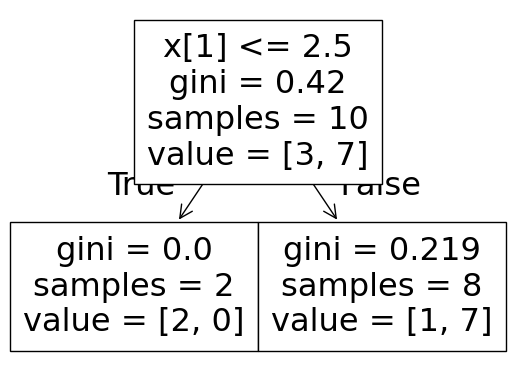

In [176]:
plot_tree(dt3)

<Axes: >

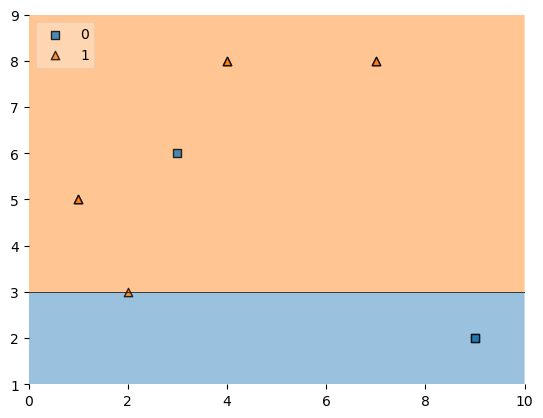

In [177]:
plot_decision_regions(x,y,clf=dt3,legend=2)

In [178]:
df3['y_pred'] = dt3.predict(x)

In [179]:
df3

,X1,X2,label,weight,y_pred
3,4,8,1,0.1,1
2,3,6,0,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1
9,9,2,0,0.1,0
0,1,5,1,0.1,1
9,9,2,0,0.1,0
7,7,8,1,0.1,1
1,2,3,1,0.1,1
0,1,5,1,0.1,1


In [180]:
error = np.abs(df3['label'].sum() - df3['y_pred'].sum())/df2.shape[0]
error

0.1

In [182]:
alpha3 = calculate_error_weight(error)
alpha3

1.0986122886681098

In [183]:
print(alpha,alpha2,alpha3)

0.42364893019360184 0.42364893019360184 1.0986122886681098


Prediction

In [184]:
query = np.array([1,5]).reshape(1,2)

In [186]:
dt.predict(query)

array([1], dtype=int64)

In [187]:
dt2.predict(query)

array([1], dtype=int64)

In [188]:
dt3.predict(query)

array([1], dtype=int64)

In [192]:
np.sign(alpha*(1) + alpha2*(1) + alpha3*(1))

1.0

In [191]:
query = np.array([9,9]).reshape(1,2)
print(dt.predict(query))
print(dt2.predict(query))
print(dt3.predict(query))

[0]
[0]
[1]


In [195]:
alpha*(-1) + alpha2*(-1) + alpha3*(1)

0.2513144282809061

In [194]:
np.sign(alpha*(-1) + alpha2*(-1) + alpha3*(1))

1.0